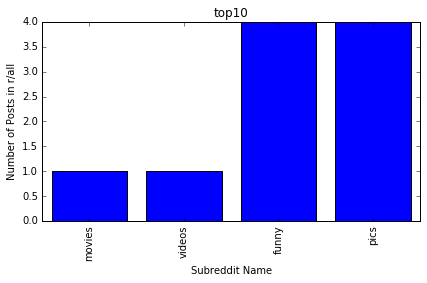

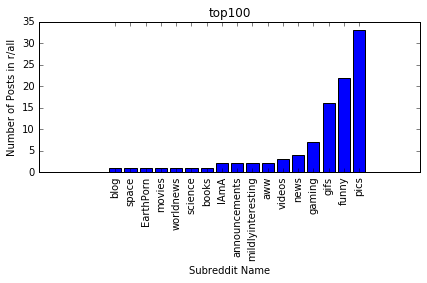

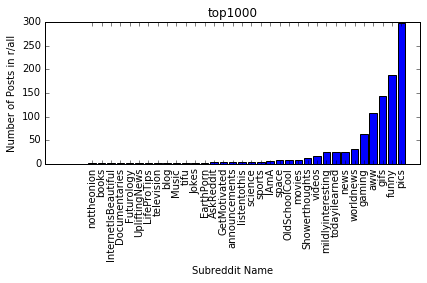

In [55]:
import json
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline


def read_json_file(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
        return data
    


top10_data = read_json_file("top10_data.json")
top100_data = read_json_file("top100_data.json")
top1000_data = read_json_file("top1000_data.json")


def getSubredditArray(jsonData):
    subdict = {}
    dict = {}
    
    for entry in jsonData:
        string = entry['subreddit']
        if(str(string) not in subdict):
            subdict[string] = 1
        
        else:
            subdict[string] +=1
            
    return subdict


def plotBarGraph(data, outputFile):
    newDict = {}
    keyList = []
    valueList = []
    barDict = getSubredditArray(data)
    sortDict = sorted(barDict.items(), key=lambda x: x[1])
    for k, v in sortDict:
        keyList.append(k)
        valueList.append(v)
        
    fig, ax = plt.subplots()
    ax.set_title(outputFile)
    ax.set_ylabel('Number of Posts in r/all')
    ax.set_xlabel('Subreddit Name')


    plt.bar(np.arange(len(sortDict)), list(valueList),align='center')
    plt.xticks(np.arange(len(sortDict)), keyList,rotation=90)
    plt.tight_layout(pad=1)
    plt.savefig(outputFile +".png")
    
plotBarGraph(top10_data, "top10")
plotBarGraph(top100_data, "top100")
plotBarGraph(top1000_data, "top1000")

